In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [103]:
df = pd.read_excel("https://github.com/hagarwal011/Data_Wizards/raw/refs/heads/main/Aviation_KPIs_Dataset.xlsx")

In [104]:
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21.328,2024-07-10 02:38:53.731,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:22.686,2024-07-07 02:53:44.150,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:38.578,2024-12-05 01:00:54.473,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:46.814,2024-09-21 13:23:41.615,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58.467,2024-03-21 15:05:54.375,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Flight Number                     200000 non-null  object        
 1   Scheduled Departure Time          200000 non-null  datetime64[ns]
 2   Actual Departure Time             200000 non-null  datetime64[ns]
 3   Delay (Minutes)                   200000 non-null  int64         
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64       
 5   Turnaround Time (Minutes)         200000 non-null  int64         
 6   Load Factor (%)                   200000 non-null  float64       
 7   Fleet Availability (%)            200000 non-null  float64       
 8   Maintenance Downtime (Hours)      200000 non-null  float64       
 9   Fuel Efficiency (ASK)             200000 non-null  float64       
 10  Revenue (USD)                   

In [106]:
df.describe()

,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
count,200000,200000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2024-06-29 07:21:27.047897856,2024-06-29 08:55:04.198966016,59.35885,12.003438,74.451680,74.997178,85.001378,5.503103,3.496959,25571.448338,20429.003323,15.011169,2550.025537,1.752445,7818.578193,6245.613443,5142.445015
min,2024-01-01 00:01:53.341000,2024-01-01 00:03:33.981000,0.00000,8.000000,30.000000,50.000000,70.000000,1.000000,2.000000,1000.060000,800.030000,5.000000,100.020000,0.500000,203.110000,164.830000,-38973.960000
25%,2024-03-30 22:12:47.147000064,2024-03-30 15:40:28.572750080,29.00000,9.990000,52.000000,62.500000,77.480000,3.250000,2.750000,13297.042500,10609.022500,10.010000,1325.570000,1.130000,3812.782500,3041.547500,-7983.690000
50%,2024-06-29 10:33:27.125000192,2024-06-28 20:10:25.013499904,59.00000,12.010000,74.000000,74.960000,85.000000,5.500000,3.490000,25566.300000,20410.885000,15.000000,2544.210000,1.750000,7315.460000,5834.705000,5216.975000
75%,2024-09-27 09:33:27.652499968,2024-09-28 03:54:08.405749760,89.00000,14.010000,97.000000,87.530000,92.530000,7.760000,4.250000,37860.402500,30245.907500,20.010000,3776.387500,2.370000,10909.272500,8715.670000,18269.647500
max,2024-12-27 05:14:38.598000,2024-12-27 05:07:36.226000,119.00000,16.000000,119.000000,100.000000,100.000000,10.000000,5.000000,49999.950000,39999.840000,25.000000,5000.000000,3.000000,24999.340000,19928.340000,49054.690000
std,NaN,NaN,34.67602,2.311966,25.977826,14.439393,8.672413,2.601257,0.865309,14158.512116,11316.410641,5.778340,1414.291993,0.720194,4947.028923,3957.358310,18123.595784


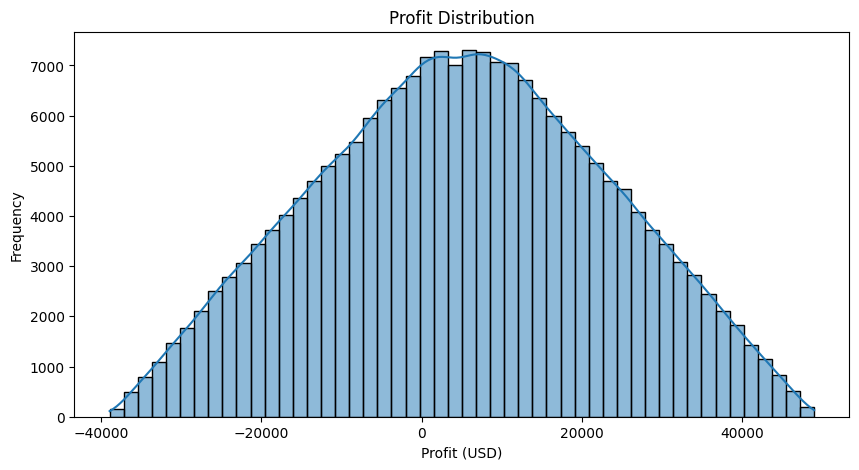

In [107]:
# Visualize profit distribution with histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["Profit (USD)"], bins=50, kde=True)
plt.title("Profit Distribution")
plt.xlabel("Profit (USD)")
plt.ylabel("Frequency")
plt.show()

In [108]:
corr_df = df.drop(columns = ['Flight Number', 'Scheduled Departure Time', 'Actual Departure Time'])

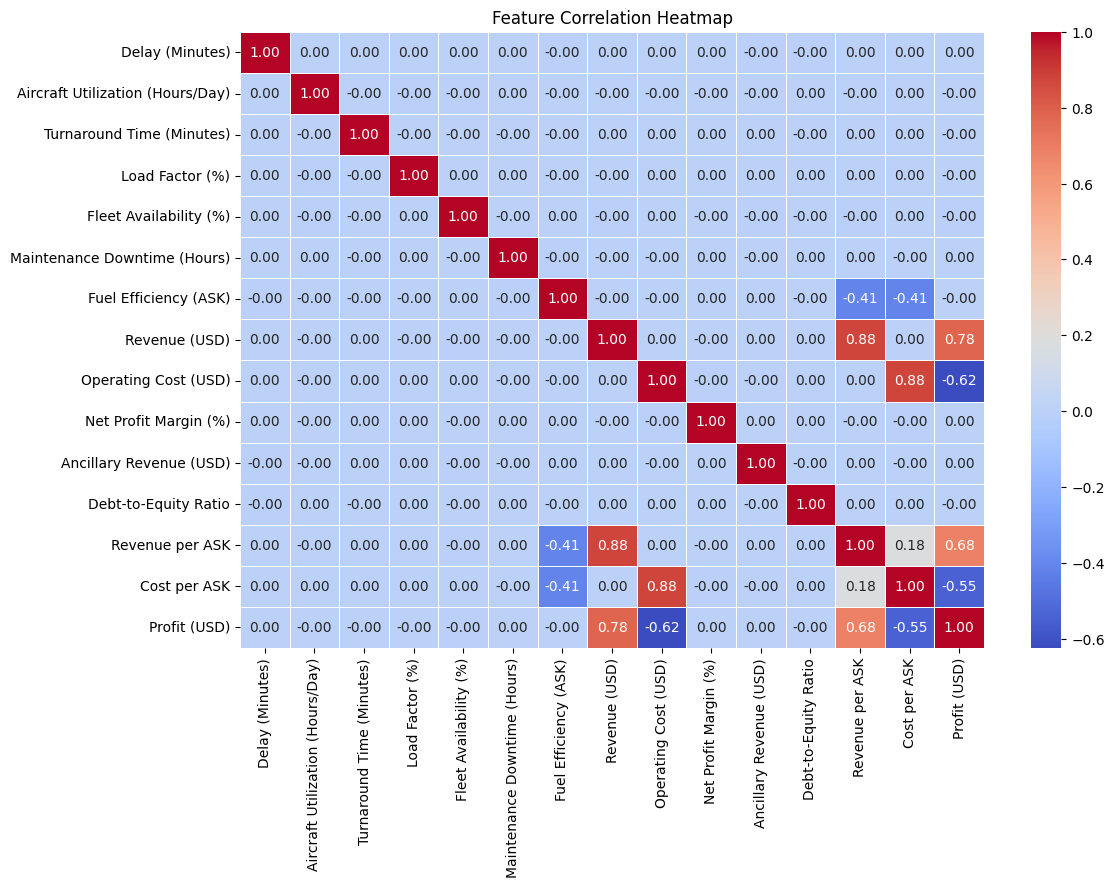

In [109]:
# Compute the correlation matrix
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [110]:
# Feature Engineering

# Time-based Features
df["Departure Hour"] = df["Actual Departure Time"].dt.hour
df["Day of Week"] = df["Actual Departure Time"].dt.dayofweek  # Monday=0, Sunday=6
df["Actual Month"] = df["Actual Departure Time"].dt.month

In [111]:
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),...,Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD),Departure Hour,Day of Week,Actual Month
0,FL885,2024-05-20 11:51:21.328,2024-07-10 02:38:53.731,50,12.36,115,79.18,96.24,9.21,4.15,...,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84,2,2,7
1,FL930,2024-01-23 06:56:22.686,2024-07-07 02:53:44.150,27,14.53,83,98.59,80.49,1.55,3.93,...,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84,2,6,7
2,FL478,2024-05-30 09:18:38.578,2024-12-05 01:00:54.473,108,10.73,87,67.44,97.90,2.06,4.26,...,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61,1,3,12
3,FL637,2024-08-15 05:21:46.814,2024-09-21 13:23:41.615,64,15.10,99,69.01,80.17,6.85,4.13,...,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92,13,5,9
4,FL318,2024-07-25 15:29:58.467,2024-03-21 15:05:54.375,30,13.46,114,50.36,82.23,7.30,4.97,...,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50,15,3,3


In [112]:
df_updated = df.drop(columns = ['Flight Number', 'Scheduled Departure Time', 'Actual Departure Time'])

In [113]:
df_updated.head()

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD),Departure Hour,Day of Week,Actual Month
0,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84,2,2,7
1,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84,2,6,7
2,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61,1,3,12
3,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92,13,5,9
4,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50,15,3,3


In [114]:
# Splitting the data into x and y

x = df_updated.drop(columns = ['Profit (USD)'])
y = df_updated['Profit (USD)']

In [115]:
# Splitting the data into Training data and Testing Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [116]:
x_train.shape

(160000, 17)

In [117]:
y_train.shape

(160000,)

In [118]:
x_test.shape

(40000, 17)

In [119]:
y_test.shape

(40000,)

In [120]:
rf = RandomForestRegressor(n_estimators=50, max_depth = 10, random_state=42)

In [121]:
# Training the Model

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [122]:
# Predicting the training and testing data

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [123]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

In [124]:
print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training MAE:", mae_train)
print("Testing MAE:", mae_test)

Training R-squared: 0.999834400957984
Testing R-squared: 0.9998128426343269
Training MSE: 54489.85058701098
Testing MSE: 61029.92246616745
Training MAE: 182.45459887948044
Testing MAE: 193.18453212394613


In [125]:
# Convert actual and predicted values to DataFrames
train_df = pd.DataFrame(x_train, columns=x_train.columns)
train_df['Actual Profit'] = y_train
train_df['Predicted Profit'] = y_train_pred
train_df['Dataset'] = 'Train'  # Add a column to indicate train data

test_df = pd.DataFrame(x_test, columns=x_test.columns)
test_df['Actual Profit'] = y_test
test_df['Predicted Profit'] = y_test_pred
test_df['Dataset'] = 'Test'  # Add a column to indicate test data

# Combine both datasets into a single DataFrame
final_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [126]:
final_df.head()

,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Departure Hour,Day of Week,Actual Month,Actual Profit,Predicted Profit,Dataset
0,6,10.21,68,61.78,71.99,4.78,3.62,23577.89,33310.45,23.02,2569.42,1.31,6513.23,9201.78,23,1,7,-9732.56,-9610.063900,Train
1,4,14.92,70,88.44,71.76,4.52,3.38,6976.90,3287.11,5.97,322.55,0.83,2064.17,972.52,13,2,1,3689.79,3189.954983,Train
2,86,14.58,71,76.25,87.72,2.22,4.68,36163.09,16474.00,7.48,559.94,2.21,7727.16,3520.09,3,5,7,19689.09,19609.181940,Train
3,112,15.97,46,94.81,91.69,3.85,3.20,47802.46,22822.69,10.07,991.08,2.17,14938.27,7132.09,23,5,6,24979.77,25045.050510,Train
4,106,10.26,79,67.68,85.75,6.50,3.41,43074.25,26241.83,8.43,162.65,1.83,12631.74,7695.55,12,4,9,16832.42,16860.935950,Train


In [127]:
# Save to CSV
final_df.to_csv("airline_profit_predictions_full.csv", index=False)